### Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [3]:
df = pd.read_csv("cleaned_data/df_processed.csv")
df_copy = df.copy()
df.head()

,individual_id,age,dod,sex,obs_date,source,hdss_name,alco_ever,alco_12m,alco_30d,...,alcohol_use,tobacco_use,stroke_status_derived_age,hpt_status_derived_age,diab_status_derived_age,hiv_status_derived_age,stroke_status_derived_incident,hpt_status_derived_incident,diab_status_derived_incident,hiv_status_derived_incident
0,000025C5-5811-4942-8957-8A1A4FF1460F,35,NaN,2,2008-07-26,Assess Linkages Main,Nairobi,0.0,NaN,NaN,...,888,0.0,35.0,35.0,35.0,35.0,0,0,0,0
1,000025C5-5811-4942-8957-8A1A4FF1460F,39,NaN,2,2012-09-30,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,39.0,39.0,39.0,39.0,0,1,0,0
2,0004A623-93CA-4D53-B10C-805B27EFD98F,36,NaN,1,2012-08-26,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,36.0,36.0,36.0,36.0,0,1,0,0
3,000D523D-F549-40B3-B8E1-2FF517084EB0,56,NaN,1,2008-04-30,Assess Linkages Main,Nairobi,0.0,NaN,NaN,...,888,0.0,56.0,56.0,56.0,56.0,0,1,0,0
4,000D523D-F549-40B3-B8E1-2FF517084EB0,61,NaN,1,2012-08-24,SCALEUP Population Baseline,Nairobi,NaN,0.0,NaN,...,0,0.0,61.0,56.0,61.0,61.0,0,0,0,0


### Descriptives

#### Total individuals vs. stroke cases

In [18]:
total_records = df.shape
total = df.individual_id.nunique()
stroke_cases = df.loc[df.stroke_status_derived == 1, 'individual_id'].nunique()
               
print(f"The number of total records are  ,    {total_records}")
print(f"Number of unique individuals     ,    {total}")
print(f"Number of individuals with stroke,    {stroke_cases}")

The number of total records are  ,    (46769, 111)
Number of unique individuals     ,    25486
Number of individuals with stroke,    1094


### Drop unnecessary columns

In [11]:
print(df.columns.to_list())

['individual_id', 'age', 'dod', 'sex', 'obs_date', 'source', 'hdss_name', 'alco_ever', 'alco_12m', 'alco_30d', 'alco_bing_y', 'tobac_ever', 'tobac_cur', 'tobac_smkls_ever', 'tobac_p_daily', 'tobac_freq', 'fd_fruitservings', 'fd_meals_outhome_ave', 'fd_diet_change', 'fd_fruit_days', 'fd_veg_days', 'fd_eat_drink_12h', 'fd_oil_type', 'fd_veg_servings', 'actv_walk_bicycle_days', 'actv_vigorous_sports_min', 'actv_mpa_minutes', 'actv_moderate_sports_hrs', 'actv_vigorous_sports', 'actv_mpa_days', 'actv_vpa_days', 'actv_sitting_or_standing', 'actv_walk_bicycle_min', 'actv_vpa_hrs', 'actv_walk_bicycle_hrs', 'actv_walk_bicycle', 'actv_moderate_sports_days', 'actv_mpa_hrs', 'actv_sitting_min', 'actv_moderate_sports_min', 'actv_sleeping_hrs', 'actv_vigorous_sports_days', 'actv_moderate_sports', 'actv_vpa_minutes', 'actv_vpa', 'actv_mpa', 'actv_vigorous_sports_hrs', 'actv_mvpa', 'actv_sitting_hrs', 'stroke_ever', 'stroke_numb', 'stroke_wkness', 'stroke_paralysis_ever', 'stroke_blind', 'stroke_trans

### Checking for missingness

In [7]:
# Count missing values per column
df.isnull().sum()

# Percentage of missing values
df.isnull().mean() * 100

individual_id                      0.000000
age                                0.000000
dod                               86.129701
sex                                0.000000
obs_date                           0.000000
                                    ...    
hiv_status_derived_age             0.000000
stroke_status_derived_incident     0.000000
hpt_status_derived_incident        0.000000
diab_status_derived_incident       0.000000
hiv_status_derived_incident        0.000000
Length: 111, dtype: float64

### Summary table for missingness

In [8]:
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
}).sort_values(by='Missing %', ascending=False)

print(missing_summary)

                                Missing Values  Missing %
tobac_p_daily                            46769      100.0
stroke_paralysis_ever                    46769      100.0
stroke_trans_isc_ever                    46769      100.0
hiv_rx_trad_ever                         46769      100.0
hiv_tested_when_d                        46769      100.0
...                                        ...        ...
hiv_status_derived_age                       0        0.0
stroke_status_derived_incident               0        0.0
hpt_status_derived_incident                  0        0.0
diab_status_derived_incident                 0        0.0
hiv_status_derived_incident                  0        0.0

[111 rows x 2 columns]


### Visualize missingness

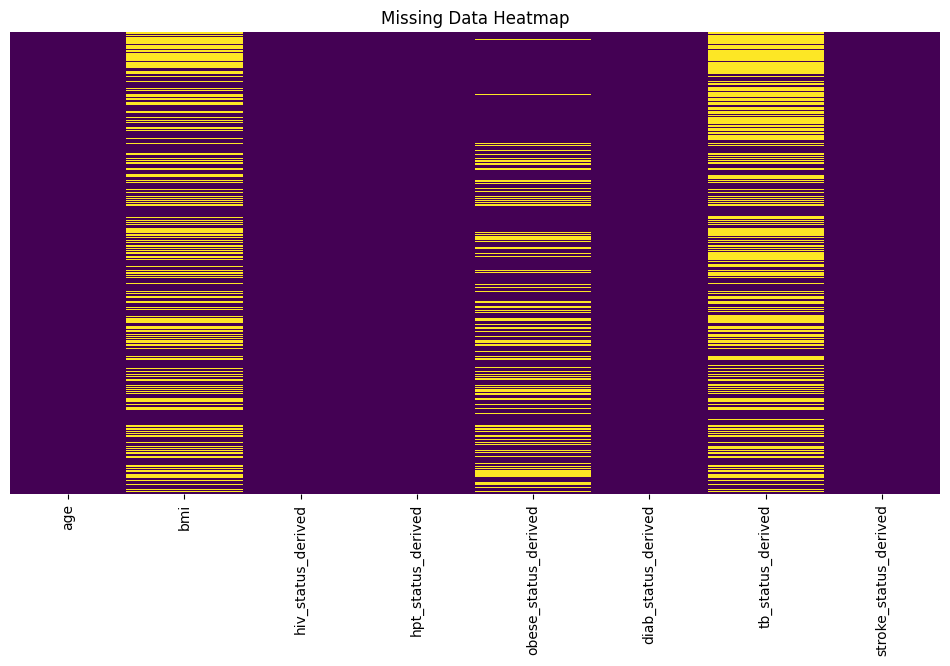

In [6]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df[[
    'age', 'bmi', 'hiv_status_derived', 'hpt_status_derived',
    'obese_status_derived', 'diab_status_derived', 'tb_status_derived','stroke_status_derived'
]].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
# Save to file (you can change format and dpi)
plt.savefig("stroke_output/missing_data_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()